In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: JPM
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


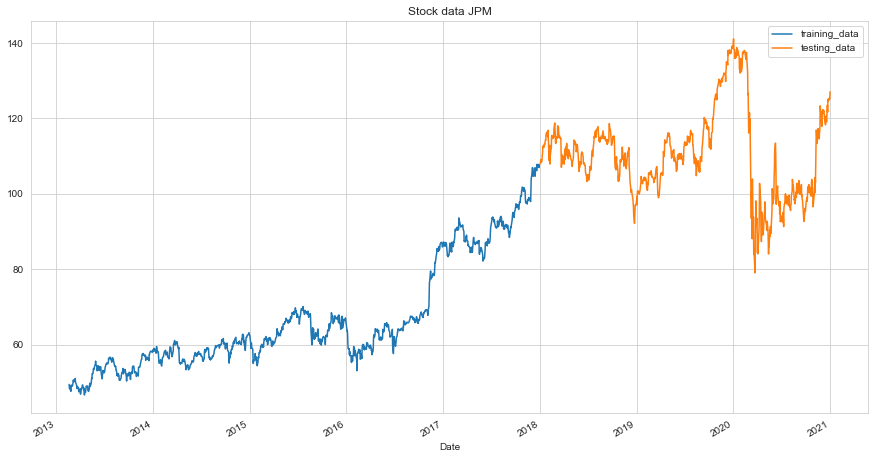

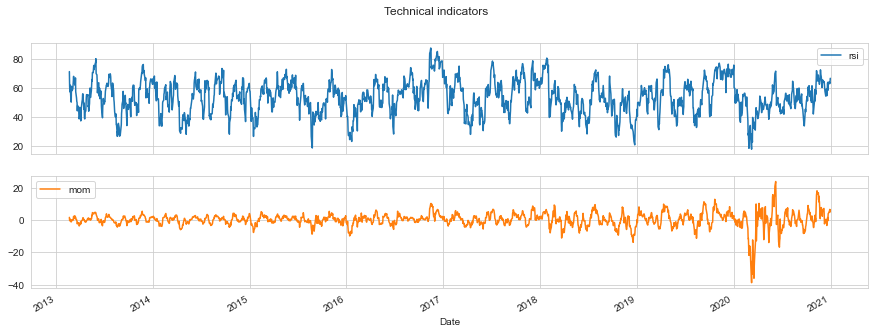

In [2]:
stock_name = 'jpm'.upper()
industry = 'Financial Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1396.00, duration: 0:00:00.273062
episode: 2/2000, episode end value: 1402.67, duration: 0:00:00.254058
episode: 3/2000, episode end value: 1351.13, duration: 0:00:00.311072
episode: 4/2000, episode end value: 1391.37, duration: 0:00:00.305069
episode: 5/2000, episode end value: 1397.93, duration: 0:00:00.306065
episode: 6/2000, episode end value: 1402.30, duration: 0:00:00.289064
episode: 7/2000, episode end value: 1407.73, duration: 0:00:00.306070
episode: 8/2000, episode end value: 1416.27, duration: 0:00:00.280066
episode: 9/2000, episode end value: 1389.16, duration: 0:00:00.268054
episode: 10/2000, episode end value: 1405.62, duration: 0:00:00.280066
episode: 11/2000, episode end value: 1431.39, duration: 0:00:00.305073
episode: 12/2000, episode end value: 1406.99, duration: 0:00:00.305072
episode: 13/2000, episode end value: 1394.34, duration: 0:00:00.338071
episode: 14/2000, episode end value: 1402.54, duration: 0:00:00.286065
episode: 15/200

episode: 117/2000, episode end value: 1370.82, duration: 0:00:00.260057
episode: 118/2000, episode end value: 1375.24, duration: 0:00:00.257062
episode: 119/2000, episode end value: 1372.77, duration: 0:00:00.258054
episode: 120/2000, episode end value: 1389.84, duration: 0:00:00.267572
episode: 121/2000, episode end value: 1377.63, duration: 0:00:00.236012
episode: 122/2000, episode end value: 1385.12, duration: 0:00:00.264052
episode: 123/2000, episode end value: 1378.59, duration: 0:00:00.288066
episode: 124/2000, episode end value: 1379.47, duration: 0:00:00.282065
episode: 125/2000, episode end value: 1383.60, duration: 0:00:00.286065
episode: 126/2000, episode end value: 1376.76, duration: 0:00:00.255056
episode: 127/2000, episode end value: 1385.80, duration: 0:00:00.250059
episode: 128/2000, episode end value: 1389.95, duration: 0:00:00.253054
episode: 129/2000, episode end value: 1373.63, duration: 0:00:00.259160
episode: 130/2000, episode end value: 1383.94, duration: 0:00:00

episode: 231/2000, episode end value: 1374.83, duration: 0:00:00.318071
episode: 232/2000, episode end value: 1376.70, duration: 0:00:00.310074
episode: 233/2000, episode end value: 1389.20, duration: 0:00:00.331072
episode: 234/2000, episode end value: 1381.41, duration: 0:00:00.288064
episode: 235/2000, episode end value: 1391.30, duration: 0:00:00.350078
episode: 236/2000, episode end value: 1378.91, duration: 0:00:00.392097
episode: 237/2000, episode end value: 1387.49, duration: 0:00:00.400091
episode: 238/2000, episode end value: 1382.03, duration: 0:00:00.419092
episode: 239/2000, episode end value: 1401.12, duration: 0:00:00.437098
episode: 240/2000, episode end value: 1389.78, duration: 0:00:00.384078
episode: 241/2000, episode end value: 1403.47, duration: 0:00:00.482111
episode: 242/2000, episode end value: 1381.46, duration: 0:00:00.492110
episode: 243/2000, episode end value: 1380.81, duration: 0:00:00.489113
episode: 244/2000, episode end value: 1381.00, duration: 0:00:00

episode: 345/2000, episode end value: 1388.47, duration: 0:00:00.514114
episode: 346/2000, episode end value: 1379.12, duration: 0:00:00.522120
episode: 347/2000, episode end value: 1377.74, duration: 0:00:00.498113
episode: 348/2000, episode end value: 1373.96, duration: 0:00:00.580130
episode: 349/2000, episode end value: 1380.21, duration: 0:00:00.556126
episode: 350/2000, episode end value: 1378.46, duration: 0:00:00.504121
episode: 351/2000, episode end value: 1376.24, duration: 0:00:00.481102
episode: 352/2000, episode end value: 1389.20, duration: 0:00:00.474764
episode: 353/2000, episode end value: 1376.34, duration: 0:00:00.502114
episode: 354/2000, episode end value: 1380.60, duration: 0:00:00.450102
episode: 355/2000, episode end value: 1386.51, duration: 0:00:00.473592
episode: 356/2000, episode end value: 1384.66, duration: 0:00:00.506148
episode: 357/2000, episode end value: 1381.85, duration: 0:00:00.485106
episode: 358/2000, episode end value: 1390.79, duration: 0:00:00

episode: 459/2000, episode end value: 1382.35, duration: 0:00:00.336076
episode: 460/2000, episode end value: 1372.30, duration: 0:00:00.398095
episode: 461/2000, episode end value: 1359.82, duration: 0:00:00.335074
episode: 462/2000, episode end value: 1374.94, duration: 0:00:00.356084
episode: 463/2000, episode end value: 1374.96, duration: 0:00:00.368084
episode: 464/2000, episode end value: 1389.62, duration: 0:00:00.407091
episode: 465/2000, episode end value: 1372.71, duration: 0:00:00.357081
episode: 466/2000, episode end value: 1378.15, duration: 0:00:00.380083
episode: 467/2000, episode end value: 1380.24, duration: 0:00:00.416687
episode: 468/2000, episode end value: 1388.03, duration: 0:00:00.418596
episode: 469/2000, episode end value: 1375.48, duration: 0:00:00.419093
episode: 470/2000, episode end value: 1380.42, duration: 0:00:00.393089
episode: 471/2000, episode end value: 1474.65, duration: 0:00:00.404089
episode: 472/2000, episode end value: 1477.58, duration: 0:00:00

episode: 573/2000, episode end value: 1392.11, duration: 0:00:00.511117
episode: 574/2000, episode end value: 1432.45, duration: 0:00:00.434105
episode: 575/2000, episode end value: 1383.70, duration: 0:00:00.433100
episode: 576/2000, episode end value: 1377.61, duration: 0:00:00.438097
episode: 577/2000, episode end value: 1465.83, duration: 0:00:00.421094
episode: 578/2000, episode end value: 1422.20, duration: 0:00:00.453106
episode: 579/2000, episode end value: 1417.58, duration: 0:00:00.480108
episode: 580/2000, episode end value: 1438.09, duration: 0:00:00.426098
episode: 581/2000, episode end value: 1469.31, duration: 0:00:00.508115
episode: 582/2000, episode end value: 1413.66, duration: 0:00:00.439103
episode: 583/2000, episode end value: 1385.05, duration: 0:00:00.469102
episode: 584/2000, episode end value: 1464.42, duration: 0:00:00.474109
episode: 585/2000, episode end value: 1462.90, duration: 0:00:00.476109
episode: 586/2000, episode end value: 1468.54, duration: 0:00:00

episode: 687/2000, episode end value: 1375.65, duration: 0:00:00.470013
episode: 688/2000, episode end value: 1464.08, duration: 0:00:00.457480
episode: 689/2000, episode end value: 1396.93, duration: 0:00:00.472106
episode: 690/2000, episode end value: 1374.00, duration: 0:00:00.474108
episode: 691/2000, episode end value: 1463.92, duration: 0:00:00.494110
episode: 692/2000, episode end value: 1466.61, duration: 0:00:00.438099
episode: 693/2000, episode end value: 1418.56, duration: 0:00:00.477107
episode: 694/2000, episode end value: 1370.84, duration: 0:00:00.470105
episode: 695/2000, episode end value: 1411.37, duration: 0:00:00.513114
episode: 696/2000, episode end value: 1400.19, duration: 0:00:00.528126
episode: 697/2000, episode end value: 1411.61, duration: 0:00:00.466104
episode: 698/2000, episode end value: 1467.70, duration: 0:00:00.469104
episode: 699/2000, episode end value: 1411.81, duration: 0:00:00.475108
episode: 700/2000, episode end value: 1391.27, duration: 0:00:00

episode: 801/2000, episode end value: 1371.99, duration: 0:00:00.358081
episode: 802/2000, episode end value: 1373.95, duration: 0:00:00.445095
episode: 803/2000, episode end value: 1366.03, duration: 0:00:00.446098
episode: 804/2000, episode end value: 1375.13, duration: 0:00:00.445102
episode: 805/2000, episode end value: 1376.82, duration: 0:00:00.426095
episode: 806/2000, episode end value: 1391.12, duration: 0:00:00.488109
episode: 807/2000, episode end value: 1465.74, duration: 0:00:00.520120
episode: 808/2000, episode end value: 1390.44, duration: 0:00:00.432097
episode: 809/2000, episode end value: 1463.99, duration: 0:00:00.470102
episode: 810/2000, episode end value: 1393.75, duration: 0:00:00.454109
episode: 811/2000, episode end value: 1418.54, duration: 0:00:00.491112
episode: 812/2000, episode end value: 1416.94, duration: 0:00:00.468107
episode: 813/2000, episode end value: 1433.53, duration: 0:00:00.511116
episode: 814/2000, episode end value: 1414.86, duration: 0:00:00

episode: 915/2000, episode end value: 1407.16, duration: 0:00:00.405090
episode: 916/2000, episode end value: 1424.13, duration: 0:00:00.354080
episode: 917/2000, episode end value: 1396.48, duration: 0:00:00.422100
episode: 918/2000, episode end value: 1432.91, duration: 0:00:00.434097
episode: 919/2000, episode end value: 1465.31, duration: 0:00:00.428094
episode: 920/2000, episode end value: 1420.55, duration: 0:00:00.484107
episode: 921/2000, episode end value: 1412.69, duration: 0:00:00.458099
episode: 922/2000, episode end value: 1406.90, duration: 0:00:00.454106
episode: 923/2000, episode end value: 1396.20, duration: 0:00:00.430098
episode: 924/2000, episode end value: 1387.42, duration: 0:00:00.516118
episode: 925/2000, episode end value: 1380.83, duration: 0:00:00.438097
episode: 926/2000, episode end value: 1377.20, duration: 0:00:00.428095
episode: 927/2000, episode end value: 1465.40, duration: 0:00:00.492132
episode: 928/2000, episode end value: 1442.07, duration: 0:00:00

episode: 1029/2000, episode end value: 1406.39, duration: 0:00:00.487113
episode: 1030/2000, episode end value: 1422.55, duration: 0:00:00.499110
episode: 1031/2000, episode end value: 1411.77, duration: 0:00:00.516114
episode: 1032/2000, episode end value: 1384.83, duration: 0:00:00.501114
episode: 1033/2000, episode end value: 1372.47, duration: 0:00:00.452104
episode: 1034/2000, episode end value: 1412.30, duration: 0:00:00.332076
episode: 1035/2000, episode end value: 1405.58, duration: 0:00:00.403868
episode: 1036/2000, episode end value: 1375.31, duration: 0:00:00.392090
episode: 1037/2000, episode end value: 1412.64, duration: 0:00:00.463397
episode: 1038/2000, episode end value: 1478.10, duration: 0:00:00.441473
episode: 1039/2000, episode end value: 1403.17, duration: 0:00:00.433099
episode: 1040/2000, episode end value: 1485.56, duration: 0:00:00.363082
episode: 1041/2000, episode end value: 1414.65, duration: 0:00:00.453102
episode: 1042/2000, episode end value: 1456.38, dur

episode: 1142/2000, episode end value: 1418.50, duration: 0:00:00.436102
episode: 1143/2000, episode end value: 1459.59, duration: 0:00:00.437100
episode: 1144/2000, episode end value: 1415.42, duration: 0:00:00.507111
episode: 1145/2000, episode end value: 1383.57, duration: 0:00:00.535123
episode: 1146/2000, episode end value: 1465.95, duration: 0:00:00.498113
episode: 1147/2000, episode end value: 1465.14, duration: 0:00:00.437672
episode: 1148/2000, episode end value: 1464.29, duration: 0:00:00.437103
episode: 1149/2000, episode end value: 1405.42, duration: 0:00:00.505108
episode: 1150/2000, episode end value: 1402.40, duration: 0:00:00.550128
episode: 1151/2000, episode end value: 1370.29, duration: 0:00:00.534613
episode: 1152/2000, episode end value: 1394.55, duration: 0:00:00.487029
episode: 1153/2000, episode end value: 1391.84, duration: 0:00:00.401089
episode: 1154/2000, episode end value: 1465.55, duration: 0:00:00.460104
episode: 1155/2000, episode end value: 1466.38, dur

episode: 1255/2000, episode end value: 1402.62, duration: 0:00:00.503114
episode: 1256/2000, episode end value: 1425.02, duration: 0:00:00.466107
episode: 1257/2000, episode end value: 1464.15, duration: 0:00:00.490685
episode: 1258/2000, episode end value: 1419.38, duration: 0:00:00.458921
episode: 1259/2000, episode end value: 1416.43, duration: 0:00:00.475106
episode: 1260/2000, episode end value: 1410.77, duration: 0:00:00.513113
episode: 1261/2000, episode end value: 1428.24, duration: 0:00:00.438101
episode: 1262/2000, episode end value: 1466.16, duration: 0:00:00.473106
episode: 1263/2000, episode end value: 1393.14, duration: 0:00:00.484114
episode: 1264/2000, episode end value: 1404.02, duration: 0:00:00.502120
episode: 1265/2000, episode end value: 1465.52, duration: 0:00:00.474104
episode: 1266/2000, episode end value: 1395.13, duration: 0:00:00.458098
episode: 1267/2000, episode end value: 1384.04, duration: 0:00:00.449747
episode: 1268/2000, episode end value: 1377.98, dur

episode: 1368/2000, episode end value: 1468.64, duration: 0:00:00.472106
episode: 1369/2000, episode end value: 1417.69, duration: 0:00:00.475109
episode: 1370/2000, episode end value: 1465.03, duration: 0:00:00.445098
episode: 1371/2000, episode end value: 1422.59, duration: 0:00:00.473107
episode: 1372/2000, episode end value: 1411.15, duration: 0:00:00.478107
episode: 1373/2000, episode end value: 1464.16, duration: 0:00:00.488110
episode: 1374/2000, episode end value: 1413.62, duration: 0:00:00.469107
episode: 1375/2000, episode end value: 1409.76, duration: 0:00:00.462104
episode: 1376/2000, episode end value: 1413.79, duration: 0:00:00.483674
episode: 1377/2000, episode end value: 1403.00, duration: 0:00:00.498993
episode: 1378/2000, episode end value: 1437.02, duration: 0:00:00.441329
episode: 1379/2000, episode end value: 1466.60, duration: 0:00:00.459102
episode: 1380/2000, episode end value: 1461.96, duration: 0:00:00.463112
episode: 1381/2000, episode end value: 1410.99, dur

episode: 1481/2000, episode end value: 1416.23, duration: 0:00:00.492110
episode: 1482/2000, episode end value: 1404.63, duration: 0:00:00.491114
episode: 1483/2000, episode end value: 1389.91, duration: 0:00:00.494110
episode: 1484/2000, episode end value: 1465.75, duration: 0:00:00.560127
episode: 1485/2000, episode end value: 1414.99, duration: 0:00:00.469627
episode: 1486/2000, episode end value: 1392.61, duration: 0:00:00.474079
episode: 1487/2000, episode end value: 1409.93, duration: 0:00:00.494510
episode: 1488/2000, episode end value: 1389.74, duration: 0:00:00.490113
episode: 1489/2000, episode end value: 1463.21, duration: 0:00:00.456107
episode: 1490/2000, episode end value: 1395.64, duration: 0:00:00.529119
episode: 1491/2000, episode end value: 1462.85, duration: 0:00:00.480112
episode: 1492/2000, episode end value: 1462.11, duration: 0:00:00.481111
episode: 1493/2000, episode end value: 1426.79, duration: 0:00:00.449101
episode: 1494/2000, episode end value: 1409.05, dur

episode: 1594/2000, episode end value: 1407.41, duration: 0:00:00.478106
episode: 1595/2000, episode end value: 1403.62, duration: 0:00:00.496113
episode: 1596/2000, episode end value: 1464.03, duration: 0:00:00.446101
episode: 1597/2000, episode end value: 1463.70, duration: 0:00:00.449107
episode: 1598/2000, episode end value: 1422.61, duration: 0:00:00.432098
episode: 1599/2000, episode end value: 1418.04, duration: 0:00:00.504141
episode: 1600/2000, episode end value: 1391.87, duration: 0:00:00.472106
episode: 1601/2000, episode end value: 1397.60, duration: 0:00:00.544126
episode: 1602/2000, episode end value: 1387.60, duration: 0:00:00.508119
episode: 1603/2000, episode end value: 1435.71, duration: 0:00:00.503108
episode: 1604/2000, episode end value: 1464.41, duration: 0:00:00.553126
episode: 1605/2000, episode end value: 1430.73, duration: 0:00:00.461101
episode: 1606/2000, episode end value: 1394.00, duration: 0:00:00.465106
episode: 1607/2000, episode end value: 1397.50, dur

episode: 1707/2000, episode end value: 1463.62, duration: 0:00:00.393623
episode: 1708/2000, episode end value: 1394.72, duration: 0:00:00.486111
episode: 1709/2000, episode end value: 1406.77, duration: 0:00:00.423096
episode: 1710/2000, episode end value: 1494.03, duration: 0:00:00.386086
episode: 1711/2000, episode end value: 1433.44, duration: 0:00:00.413094
episode: 1712/2000, episode end value: 1410.10, duration: 0:00:00.354364
episode: 1713/2000, episode end value: 1370.12, duration: 0:00:00.380319
episode: 1714/2000, episode end value: 1483.74, duration: 0:00:00.407068
episode: 1715/2000, episode end value: 1427.77, duration: 0:00:00.434098
episode: 1716/2000, episode end value: 1487.91, duration: 0:00:00.433102
episode: 1717/2000, episode end value: 1428.54, duration: 0:00:00.460106
episode: 1718/2000, episode end value: 1388.64, duration: 0:00:00.436100
episode: 1719/2000, episode end value: 1404.02, duration: 0:00:00.401091
episode: 1720/2000, episode end value: 1435.93, dur

episode: 1820/2000, episode end value: 1456.78, duration: 0:00:00.388089
episode: 1821/2000, episode end value: 1462.26, duration: 0:00:00.429095
episode: 1822/2000, episode end value: 1414.72, duration: 0:00:00.382085
episode: 1823/2000, episode end value: 1464.07, duration: 0:00:00.408094
episode: 1824/2000, episode end value: 1385.58, duration: 0:00:00.437098
episode: 1825/2000, episode end value: 1466.03, duration: 0:00:00.497117
episode: 1826/2000, episode end value: 1462.92, duration: 0:00:00.466104
episode: 1827/2000, episode end value: 1419.56, duration: 0:00:00.481111
episode: 1828/2000, episode end value: 1411.16, duration: 0:00:00.539119
episode: 1829/2000, episode end value: 1417.95, duration: 0:00:00.474107
episode: 1830/2000, episode end value: 1465.11, duration: 0:00:00.429095
episode: 1831/2000, episode end value: 1404.23, duration: 0:00:00.347079
episode: 1832/2000, episode end value: 1463.20, duration: 0:00:00.377084
episode: 1833/2000, episode end value: 1413.32, dur

episode: 1933/2000, episode end value: 1418.74, duration: 0:00:00.334079
episode: 1934/2000, episode end value: 1393.80, duration: 0:00:00.382086
episode: 1935/2000, episode end value: 1377.64, duration: 0:00:00.367082
episode: 1936/2000, episode end value: 1390.97, duration: 0:00:00.334079
episode: 1937/2000, episode end value: 1403.21, duration: 0:00:00.319070
episode: 1938/2000, episode end value: 1410.56, duration: 0:00:00.320074
episode: 1939/2000, episode end value: 1460.33, duration: 0:00:00.303071
episode: 1940/2000, episode end value: 1508.47, duration: 0:00:00.284065
episode: 1941/2000, episode end value: 1502.75, duration: 0:00:00.263064
episode: 1942/2000, episode end value: 1425.65, duration: 0:00:00.268056
episode: 1943/2000, episode end value: 1425.46, duration: 0:00:00.303067
episode: 1944/2000, episode end value: 1415.48, duration: 0:00:00.278066
episode: 1945/2000, episode end value: 1503.17, duration: 0:00:00.273062
episode: 1946/2000, episode end value: 1470.26, dur

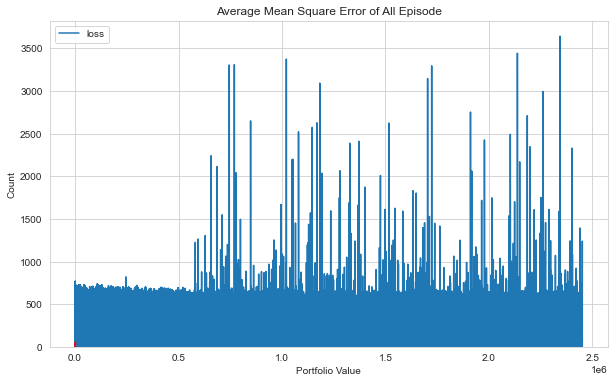

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

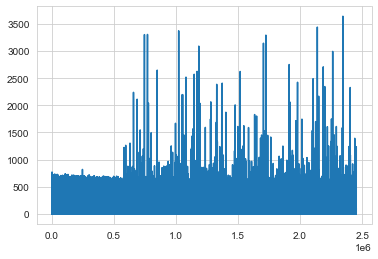

In [5]:
plt.plot(agent.model.losses)

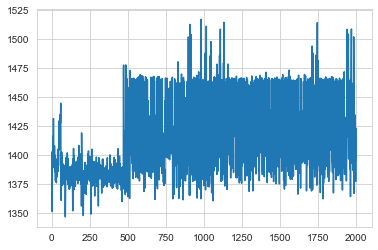

In [6]:
plt.plot(portfolio_value)

episode end value: 1106.97, duration: 0:00:00.065012
Sell: 0 times, Buy: 1 times


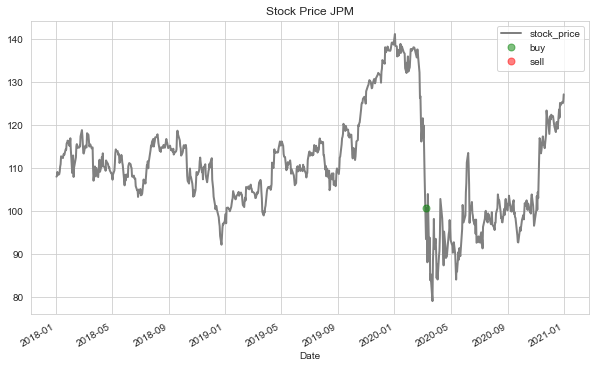

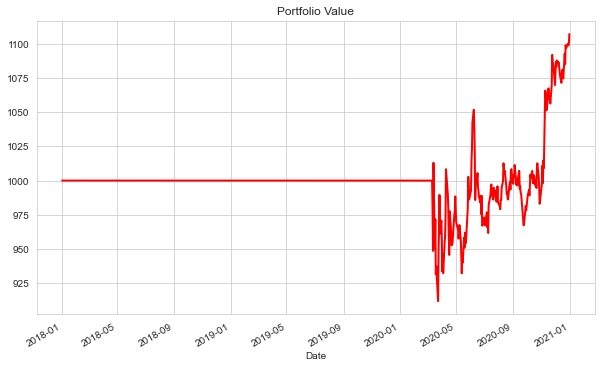

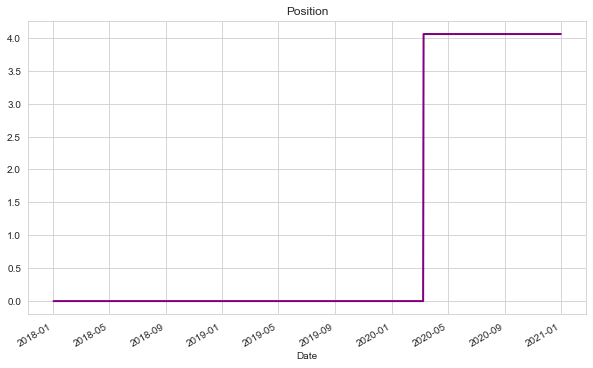

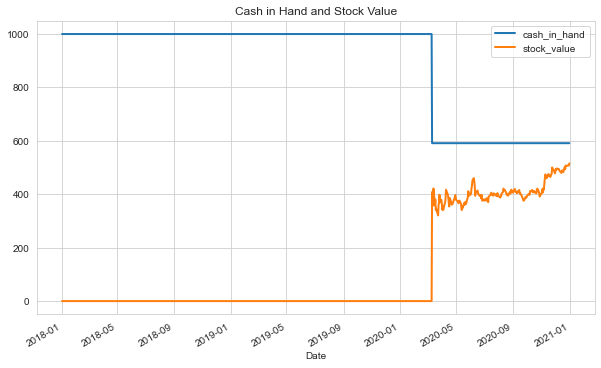

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: JPM
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 3.45 %
Volatility: 0.1145
shape ratio: 0.2048
Maximun drawdown: -9.97 %
Calmar ratio: 0.3457
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 5.59 %
Volatility (benchmark): 0.3563
shape ratio: 0.1259
Maximun drawdown: -43.99 %
Calmar ratio (benchmark): 0.1270


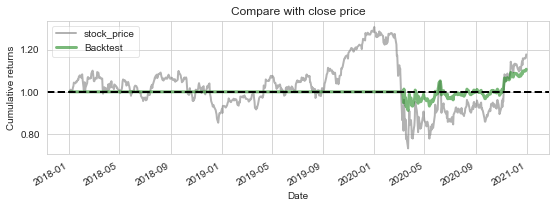

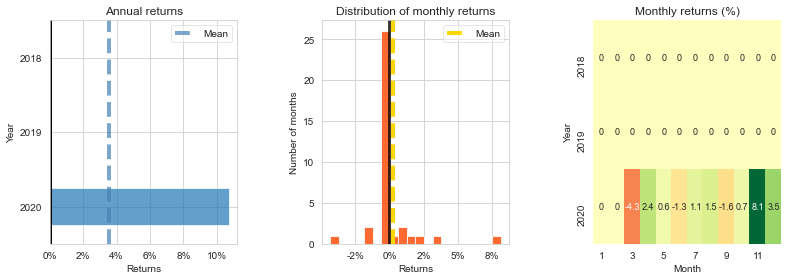

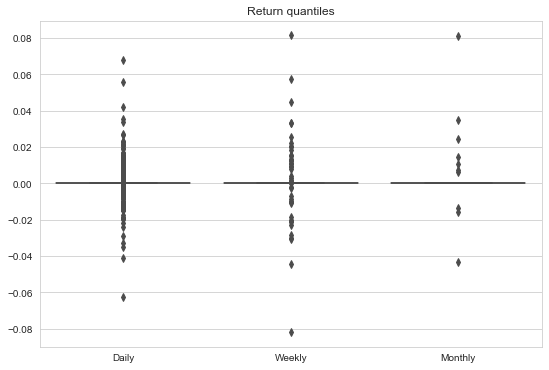

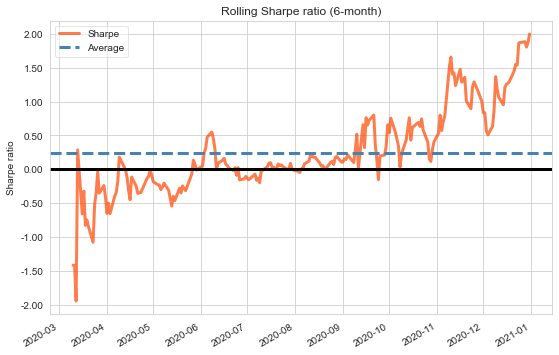

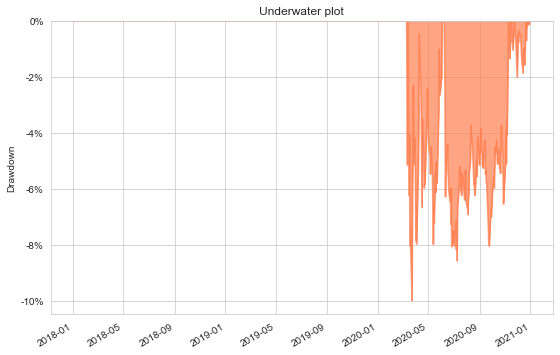

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')